In [1]:
# Libraries that this notebook will use:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from datascience import *
from matplotlib.colors import ListedColormap
import re
# Helps the maps display nicely in the notebook:
%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 20]
# Tells the notebook not to display warnings:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import IFrame

In [2]:
california = gpd.read_file('holc_ca')
california.head()

,name,holc_id,holc_grade,area_descr,area,geometry
0,None,A,A,"{ """" : """" }",Oakland,POLYGON ((-122.2025219245971 37.81098621368113...
1,None,A1,A,"{ ""1"" : ""Berkeley Green A-1"", ""10a"" : ""fair"", ...",Berkeley,"POLYGON ((-122.263194014919 37.9003948457167, ..."
2,None,A10,A,"{ ""1"" : ""Oakland, California Low Green A-10"", ...",Oakland,POLYGON ((-122.2340298202495 37.80670967378922...
3,None,A11,A,"{ ""1"" : ""Oakland, California Green A-11"", ""10a...",Oakland,POLYGON ((-122.2025219245971 37.81098621368113...
4,None,A2,A,"{ ""1"" : ""Berkeley, California Green A-2"", ""10a...",Berkeley,POLYGON ((-122.2784713548339 37.89710197965462...


In [3]:
my_cities = california[california['area'].isin({'Oakland', 'Berkeley', 'Alameda', 'Emeryville'})]

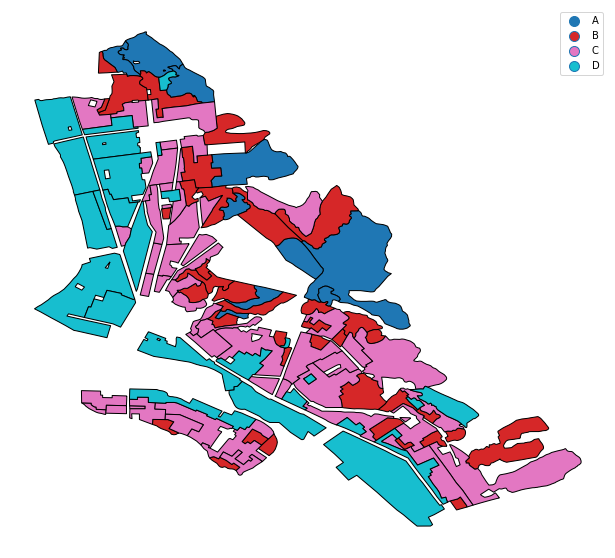

In [6]:
my_cities.plot(column = 'holc_grade',legend = True, figsize=[18, 10])
plt.axis('off')
plt.show()

In [8]:
# using old alameda dataset
alameda = gpd.read_file('alameda_shapefiles')
alameda.head()

,AFFGEOID,ALAND,ALAND_1,AWATER,AWATER_1,COUNTYFP,COUNTYFP_1,FID_1,FUNCSTAT,GEOID,GEOID_1,Geography,INTPTLAT,INTPTLON,Id,Id2,LSAD,MTFCC,NAME,NAMELSAD,NAME_1,STATEFP,STATEFP_1,TRACTCE,TRACTCE_1,female,male,medianage,mergeid,pct_20to64,pct_over64,pct_pov,pct_und_20,total_pop,geometry
0,1400000US06001400600,297856.0,297856.0,0.0,0.0,001,001,275.0,S,06001400600,06001400600,"Census Tract 4006, Alameda County, California",+37.8419909,-122.2648882,1400000US06001400600,6.001401e+09,CT,G5020,4006,Census Tract 4006,4006,06,06,400600,400600,1020.0,730.0,34.4,06001400600,78.2,9.8,8.3,12.0,1750.0,"POLYGON ((-122.26807 37.844136, -122.26514 37...."
1,1400000US06001400900,420877.0,420877.0,0.0,0.0,001,001,297.0,S,06001400900,06001400900,"Census Tract 4009, Alameda County, California",+37.8394912,-122.2802646,1400000US06001400900,6.001401e+09,CT,G5020,4009,Census Tract 4009,4009,06,06,400900,400900,1106.0,925.0,38.9,06001400900,71.0,7.7,12.0,21.0,2031.0,"POLYGON ((-122.285576 37.839778, -122.283186 3..."
2,1400000US06001401400,758241.0,758241.0,0.0,0.0,001,001,239.0,S,06001401400,06001401400,"Census Tract 4014, Alameda County, California",+37.8207562,-122.2733875,1400000US06001401400,6.001401e+09,CT,G5020,4014,Census Tract 4014,4014,06,06,401400,401400,2170.0,2127.0,31.3,06001401400,64.7,8.2,41.7,27.1,4297.0,"POLYGON ((-122.278611 37.826878, -122.268563 3..."
3,1400000US06001403000,352394.0,352394.0,0.0,0.0,001,001,258.0,S,06001403000,06001403000,"Census Tract 4030, Alameda County, California",+37.8004341,-122.2707274,1400000US06001403000,6.001403e+09,CT,G5020,4030,Census Tract 4030,4030,06,06,403000,403000,1445.0,1026.0,58.3,06001403000,47.9,43.8,30.2,8.3,2471.0,"POLYGON ((-122.274757 37.79883299999999, -122...."
4,1400000US06001405902,487280.0,487280.0,0.0,0.0,001,001,746.0,S,06001405902,06001405902,"Census Tract 4059.02, Alameda County, California",+37.7909447,-122.2409530,1400000US06001405902,6.001406e+09,CT,G5020,4059.02,Census Tract 4059.02,4059.02,06,06,405902,405902,1713.0,1808.0,31.5,06001405902,58.6,10.0,31.0,31.5,3521.0,"POLYGON ((-122.247175 37.789913, -122.243512 3..."


In [9]:
# Splitting up numerical poverty rates into two categories
sig_pov = np.array([])
for i in alameda['pct_pov']:
    if i > 20:
        sig_pov = np.append(sig_pov, 'Over 20%')
    else:
        sig_pov = np.append(sig_pov, 'Under 20%')
alameda['sig_pov'] = sig_pov

In [10]:
alameda.head()

,AFFGEOID,ALAND,ALAND_1,AWATER,AWATER_1,COUNTYFP,COUNTYFP_1,FID_1,FUNCSTAT,GEOID,GEOID_1,Geography,INTPTLAT,INTPTLON,Id,Id2,LSAD,MTFCC,NAME,NAMELSAD,NAME_1,STATEFP,STATEFP_1,TRACTCE,TRACTCE_1,female,male,medianage,mergeid,pct_20to64,pct_over64,pct_pov,pct_und_20,total_pop,geometry,sig_pov
0,1400000US06001400600,297856.0,297856.0,0.0,0.0,001,001,275.0,S,06001400600,06001400600,"Census Tract 4006, Alameda County, California",+37.8419909,-122.2648882,1400000US06001400600,6.001401e+09,CT,G5020,4006,Census Tract 4006,4006,06,06,400600,400600,1020.0,730.0,34.4,06001400600,78.2,9.8,8.3,12.0,1750.0,"POLYGON ((-122.26807 37.844136, -122.26514 37....",Under 20%
1,1400000US06001400900,420877.0,420877.0,0.0,0.0,001,001,297.0,S,06001400900,06001400900,"Census Tract 4009, Alameda County, California",+37.8394912,-122.2802646,1400000US06001400900,6.001401e+09,CT,G5020,4009,Census Tract 4009,4009,06,06,400900,400900,1106.0,925.0,38.9,06001400900,71.0,7.7,12.0,21.0,2031.0,"POLYGON ((-122.285576 37.839778, -122.283186 3...",Under 20%
2,1400000US06001401400,758241.0,758241.0,0.0,0.0,001,001,239.0,S,06001401400,06001401400,"Census Tract 4014, Alameda County, California",+37.8207562,-122.2733875,1400000US06001401400,6.001401e+09,CT,G5020,4014,Census Tract 4014,4014,06,06,401400,401400,2170.0,2127.0,31.3,06001401400,64.7,8.2,41.7,27.1,4297.0,"POLYGON ((-122.278611 37.826878, -122.268563 3...",Over 20%
3,1400000US06001403000,352394.0,352394.0,0.0,0.0,001,001,258.0,S,06001403000,06001403000,"Census Tract 4030, Alameda County, California",+37.8004341,-122.2707274,1400000US06001403000,6.001403e+09,CT,G5020,4030,Census Tract 4030,4030,06,06,403000,403000,1445.0,1026.0,58.3,06001403000,47.9,43.8,30.2,8.3,2471.0,"POLYGON ((-122.274757 37.79883299999999, -122....",Over 20%
4,1400000US06001405902,487280.0,487280.0,0.0,0.0,001,001,746.0,S,06001405902,06001405902,"Census Tract 4059.02, Alameda County, California",+37.7909447,-122.2409530,1400000US06001405902,6.001406e+09,CT,G5020,4059.02,Census Tract 4059.02,4059.02,06,06,405902,405902,1713.0,1808.0,31.5,06001405902,58.6,10.0,31.0,31.5,3521.0,"POLYGON ((-122.247175 37.789913, -122.243512 3...",Over 20%


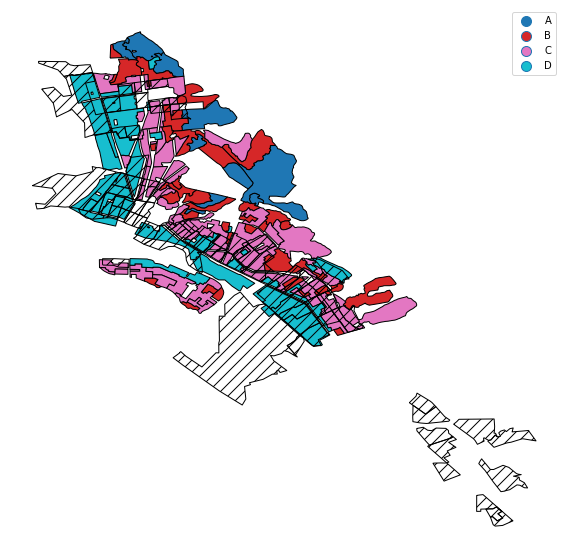

In [13]:
# set original plot as base
base = my_cities.plot(column = 'holc_grade', legend=True, figsize=[18, 10])
# Only plot over 20% areas with hatches
alameda[alameda["sig_pov"] == 'Over 20%'].plot(ax=base,facecolor="None", hatch="//", legend=True)
# you could also add in the under 20% areas and plot with o's
# alameda[alameda["sig_pov"] == 'Under 20%'].plot(ax=base, facecolor="None", hatch="o")
plt.axis('off')
plt.show()